# College rankings

## Install the variable inspector

### This is a cool extension to Jupyter that will be very helpful in seeing what is currently in the computer's memory:

In [1]:
!pip install frz-jupyterlab-variableinspector

Defaulting to user installation because normal site-packages is not writeable


## Restart the Jupyter server
### Go to File -> Hub Control Panel -> Stop My Server, then Start My Server
### Come back here when it is finished and go to Kernel -> Restart and Clear All Outputs
### Now Right click (Windows) or Control-Click (Mac) anywhere in the notebook and select "Open Variable Inspector" from the bottom of the click menu
### This opens up a new tab. Drag it so that it is in split screen.

## Libraries
### We need a few libraries installed. Let us check to make sure they are installed first:

In [2]:
!pip install openpyxl pandas numpy scipy

Defaulting to user installation because normal site-packages is not writeable


### Now we must import those libraries

In [22]:
import numpy as np

import scipy.stats as stats

import pandas as pd

### We also want to change some of the options in pandas to help us see all the data. 

### We are working with a dataset of 1,999 universities, which is too much to show on one screen! But with 48 data columns, we can scroll horizontally. We will say that it should show the first 3 and last 3 items (`min_rows` of 6), no more than 50 rows, but as many columns as there are in the data.

In [23]:
pd.set_option('display.min_rows', 6)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

pd.options.mode.chained_assignment = None

## Read in an excel file that is uploaded to the current directory
#### If you have a csv file, you would do `data = pd.read_csv("college_rankings.csv")`

In [24]:
data = pd.read_excel("college_rankings_data.xlsx")

## Exploring the data

#### Note at the bottom-left corner below the data is the __shape__ or the number of rows and columns.

In [25]:
data

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
0,Alabama A & M University,1,0,0.9175,2353.0,939.0,5546.0,18,0.0797,9240.0,9240.0,0.1589,0.0000,0.0554,0.1196,0.0000,0.0250,NaN,7709.0,0.2974,0,1,34.783368,-86.568502,31000.0,10221.0,455.0,470.0,0,14990.0,1431.0,5271.0,0,0.7110,0.7361,0.0019,0.9072,0.0011,0.0091,0.0070,0.0114,0.0383,0.7019,0.0140,0.6033,5,AL,35762
1,University of Alabama at Birmingham,1,0,0.7366,24495.0,1234.0,14983.0,15,0.4023,12307.0,12307.0,0.2008,0.0377,0.0160,0.0635,0.2214,0.0335,537349307.0,11049.0,0.6340,0,0,33.505697,-86.799345,22250.0,9500.0,608.0,620.0,0,16953.0,14554.0,13328.0,0,0.7754,0.4798,0.0678,0.2414,0.0003,0.0565,0.0230,0.0446,0.1996,0.3512,0.5586,0.6110,5,AL,35294
2,University of Alabama in Huntsville,1,0,0.8257,23917.0,1319.0,8488.0,16,0.2696,10400.0,10400.0,0.1809,0.0113,0.0743,0.2875,0.1562,0.0225,77250279.0,9688.0,0.5768,0,0,34.724557,-86.640449,21450.0,9500.0,695.0,669.0,0,15860.0,131.0,7785.0,0,0.6434,0.3976,0.0347,0.0879,0.0014,0.0566,0.0218,0.0361,0.1543,0.2536,0.7161,0.4190,5,AL,35899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Purdue University Northwest,2,0,0.2857,17323.0,1074.0,9425.0,18,0.1844,7800.0,7765.0,0.1563,0.0384,0.0384,0.0777,0.3930,0.0237,30008886.0,8324.0,0.3778,0,0,41.584324,-87.474236,21207.0,9500.0,535.0,535.0,0,11250.0,6911.0,7546.0,0,0.9971,0.3518,0.0298,0.0999,0.0007,0.2120,0.0219,0.0284,0.2387,0.3291,0.5914,0.5510,3,IN,46323
1997,Yeshiva Kollel Tifereth Elizer,1,0,0.7143,19643.0,NaN,4119.0,24,NaN,14560.0,4600.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,2615.0,NaN,0,0,40.637096,-73.992171,NaN,NaN,NaN,NaN,0,8283.0,8283.0,128.0,0,0.9167,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0078,0.8925,1.0000,0.0000,2,NY,11219
1998,University of Wisconsin-Milwaukee Flex,1,0,0.7657,NaN,NaN,3603.0,22,NaN,NaN,NaN,0.0000,0.0000,0.2286,0.0000,0.6286,0.0000,1774271.0,10354.0,NaN,0,0,43.076848,-87.880488,23948.0,8750.0,NaN,NaN,0,NaN,NaN,602.0,1,0.5882,0.4490,0.0399,0.0233,0.0017,0.0482,0.0000,0.0066,0.8970,0.2143,0.8555,0.6894,3,WI,53201


### We can also see all the columns in an easier to view list with:

In [26]:
data.columns

Index(['name', 'urban_rural', 'aapi_serving', 'acceptance_rate',
       'average_tuition_1yr', 'sat_avg', 'teaching_spent_per_student',
       'carnegie_classification', 'completion_rate_4yr',
       'cost_roomboard_offcampus', 'cost_roomboard_oncampus',
       'percent_degrees_business', 'percent_degrees_comm',
       'percent_degrees_compsci', 'percent_degrees_eng',
       'percent_degrees_health', 'percent_degrees_socsci', 'endowment',
       'avg_faculty_salary_mo', 'completion_rate_6yrs', 'hispanic_serving',
       'historically_black', 'latitude', 'longitude', 'median_debt_at_grad',
       'median_debt_at_withdraw', 'sat_avg_math', 'sat_avg_reading',
       'men_only', 'net_price', 'net_price_parents_under_30k',
       'num_undergrads', 'online_only', 'percent_fulltime_faculty',
       'ugs_percent_anyloans', 'ugs_percent_asian', 'ugs_percent_black',
       'ugs_percent_hipi', 'ugs_percent_hispanic', 'ugs_percent_intl',
       'ugs_percent_multirace', 'ugs_percent_over25', 'ugs_p

## View a few random rows

#### I often find it useful to use the `.sample()` function to pick a few random rows

In [27]:
data.sample(3)

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
944,Hofstra University,2,0,0.6849,6296.0,1262.0,17404.0,17,0.5493,21083.0,15700.0,0.2559,0.1623,0.0289,0.068,0.1123,0.0776,633700987.0,13890.0,0.6479,0,0,40.715959,-73.600780,23500.0,7500.0,630.0,620.0,0,32838.0,27616.0,6400.0,0,0.4223,0.4695,0.1181,0.0945,0.0013,0.1317,0.0544,0.0292,0.0349,0.2164,0.5488,0.5536,2,NY,11549
902,Western New Mexico University,3,0,NaN,18758.0,NaN,7622.0,18,0.1408,10568.0,10568.0,0.1220,0.0000,0.0000,0.000,0.1579,0.0144,14380926.0,6508.0,0.3446,1,0,32.776700,-108.283284,23105.0,9498.0,NaN,NaN,0,12411.0,1236.0,1620.0,0,0.3957,0.3884,0.0123,0.0630,0.0074,0.5340,0.0370,0.0228,0.3455,0.4633,0.2710,0.6636,6,NM,88061
117,Laguna College of Art and Design,4,1,0.8097,4966.0,NaN,11732.0,30,0.2727,15084.0,17086.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,2961235.0,9183.0,0.5672,0,0,33.561448,-117.772564,27000.0,9500.0,NaN,NaN,0,35355.0,34635.0,784.0,0,0.2489,0.5560,0.1658,0.0242,0.0051,0.2156,0.0421,0.0510,0.1977,0.3688,0.4821,0.7207,8,CA,92651


### In any view of a dataframe, you can add `.T` to transpose: flip rows and columns to see easier

In [28]:
data.sample(3).T

,953,357,396
name,Le Moyne College,Judson University,Trinity Christian College
urban_rural,2,1,2
aapi_serving,0,0,0
acceptance_rate,0.7362,0.3853,0.6906
average_tuition_1yr,48188.0,4798.0,4219.0
sat_avg,1186.0,1036.0,1113.0
teaching_spent_per_student,10913.0,7718.0,9052.0
carnegie_classification,18,20,22
completion_rate_4yr,0.6473,0.5108,0.5588
cost_roomboard_offcampus,14120.0,8000.0,6570.0


# Columns to input
### For lab, change these so they include all the columns you are interested in. We also want to keep the name of the school. 
### Note the spacing. You can put it all on one line, or split it into multiple lines. If you split it into multiple lines, be careful about the spacing/indendation.

In [29]:
input_columns = ['name',
                'sat_avg', 
                'average_tuition_1yr', 
                'cost_roomboard_offcampus', 
                'completion_rate_6yrs']

## Cleaning up the data, removing rows where there is blank data for certain columns

#### If we do a search query for a particular school with the `query()` function, sometimes we see `NaN`. 
#### This is how python and pandas represent blank or no data. Datasets are often incomplete! San Francisco Art Institute did not report the average SAT score. 

In [30]:
data.query("name == 'San Francisco Art Institute'")

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
148,San Francisco Art Institute,1,0,0.9033,71486.0,NaN,12459.0,30,0.3889,18629.0,18410.0,0.0,0.0,0.0,0.0,0.0,0.0,10324429.0,9689.0,0.4583,0,0,37.803575,-122.417,25000.0,9500.0,NaN,NaN,0,41392.0,3529.0,210.0,0,0.1882,0.4764,0.0571,0.0381,0.0048,0.1524,0.2714,0.0571,0.2409,0.3382,0.3714,0.6333,8,CA,94133


In [31]:
data.query("name == 'San Francisco Art Institute'").T

,148
name,San Francisco Art Institute
urban_rural,1
aapi_serving,0
acceptance_rate,0.9033
average_tuition_1yr,71486.0
sat_avg,NaN
teaching_spent_per_student,12459.0
carnegie_classification,30
completion_rate_4yr,0.3889
cost_roomboard_offcampus,18629.0


## Dropping schools that have NaN values for the columns we care about (the `input_columns`)

#### Pandas makes this easy for us with the `dropna()` function. If we specify a `subset`, then it only drops rows that have NaN values for the columns we care about. If we don't, it drops all rows if there is any NaN value in any column.

#### We want to keep our existing `data` variable, so we will save this as a new variable called `data_cleaned`. We will then select only the input_columns and save that again as `data_cleaned`:

In [32]:
data_cleaned = data.dropna(subset=input_columns)
data_cleaned = data_cleaned[input_columns]
data_cleaned

,name,sat_avg,average_tuition_1yr,cost_roomboard_offcampus,completion_rate_6yrs
0,Alabama A & M University,939.0,2353.0,9240.0,0.2974
1,University of Alabama at Birmingham,1234.0,24495.0,12307.0,0.6340
2,University of Alabama in Huntsville,1319.0,23917.0,10400.0,0.5768
...,...,...,...,...,...
1975,Husson University,1053.0,315.0,9900.0,0.5737
1987,Carolina University,979.0,2752.0,11900.0,0.4138
1996,Purdue University Northwest,1074.0,17323.0,7800.0,0.3778


#### Only 1171 colleges had data for the columns we care about

## Getting to the rankings
### Normalizing data
#### Normalizing is a process where all columns are on the same scale, which means the same difference between the largest and the smallest value. 

Some columns in the dataset are percentages, on a scale between 0 and 1, like `completion_rate_6yrs`. Others like `average_tuition_1yr` can go from 0 to over 70,000. If we had a model that was 50% each of these two variables, and we just multipled the data by 0.5, then `average_tuition` would have a much bigger impact.  

The most straightforward way to deal with this is to convert each column to be a percent of the largest value in the dataset. If we are normalizing tuition, then the school with the highest tuition would be 1.0, the school with the lowest tuition would be 0.0. We do that by dividing each value by the largest one (or the `max`imum). You can see an example of this here:

In [33]:
data_cleaned['norm_tuition_1yr'] = data_cleaned['average_tuition_1yr'] / max(data_cleaned['average_tuition_1yr'])
data_cleaned[['name','norm_tuition_1yr','average_tuition_1yr']]

,name,norm_tuition_1yr,average_tuition_1yr
0,Alabama A & M University,0.031467,2353.0
1,University of Alabama at Birmingham,0.327574,24495.0
2,University of Alabama in Huntsville,0.319844,23917.0
...,...,...,...
1975,Husson University,0.004213,315.0
1987,Carolina University,0.036803,2752.0
1996,Purdue University Northwest,0.231662,17323.0


### Z-scores

#### There is a better way of normalizing with Z-scores.

#### The average (or mean) is converted to 0.0, then most scores are between -1.0 and +1.0, but extreme outliers can get to +/- 3 or 4. You don't need to know much more than that for now. 

#### Thankfully, scipy has a function in stats that calculates it for you:

In [34]:
stats.zscore(data_cleaned['average_tuition_1yr'])

0      -1.124851
1      -0.028443
2      -0.057063
          ...   
1975   -1.225767
1987   -1.105094
1996   -0.383580
Name: average_tuition_1yr, Length: 1171, dtype: float64

#### The code below runs through each column in our input columns, then if it isn't the name column, it creates a new column that begins with `z_` and then the original column name. 

#### We could do it manually for each column we care about, but this saves time.

In [35]:
for column in input_columns:
    if column != 'name':
        z_name = "z_" + column
        print("Calculating z-scores for column " + column + ", saving as " + z_name)
        data_cleaned[z_name] = stats.zscore(data_cleaned[column])

Calculating z-scores for column sat_avg, saving as z_sat_avg
Calculating z-scores for column average_tuition_1yr, saving as z_average_tuition_1yr
Calculating z-scores for column cost_roomboard_offcampus, saving as z_cost_roomboard_offcampus
Calculating z-scores for column completion_rate_6yrs, saving as z_completion_rate_6yrs


### View scores in a histogram
#### A histogram is like an automatic bar graph of how common each value is

#### If we look at a histogram of `average_tuition_1yr` and `z_average_tuition_1yr`, they have the same shape or distribution. But the first goes from 0 to 7000, with a lot of schools at 0 and then a peak at around 25,000. The second goes from -1 to +2.5, with a peak around 0.

<AxesSubplot:ylabel='Frequency'>

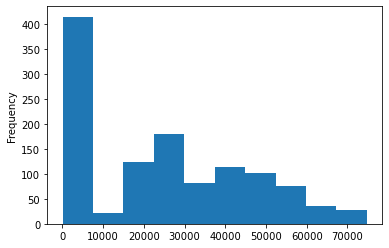

In [36]:
data_cleaned['average_tuition_1yr'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

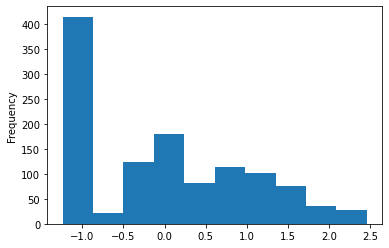

In [37]:
data_cleaned['z_average_tuition_1yr'].plot(kind='hist')

### Weighted rankings

#### Now we need to define our weights for each column. 

#### If you have something where the higher it is, the better it is (like completion rate or SAT average), then the weight should be __positive__. If you have something where the higher it is, the worse it is (like tuition or cost of living), then the weight should be __negative__.

#### If you ignore negative signs, all the weights should add up to 1.0 (or 100%)

#### We save that formula to a new column in our `data_cleaned` dataset, called `z_ranking_final`

In [38]:
data_cleaned['z_ranking_final'] = data_cleaned['z_sat_avg'] * 0.25 + \
                                  data_cleaned['z_average_tuition_1yr'] * -0.25 + \
                                  data_cleaned['z_cost_roomboard_offcampus'] * -0.2 + \
                                  data_cleaned['z_completion_rate_6yrs'] * 0.3

#### Next we want to add our `z_ranking_final` to the list of columns were are interested in. We will call this new list `display_columns` and create it as a copy of `input_columns`

In [39]:
display_columns = input_columns.copy()
display_columns.append('z_ranking_final')
display_columns

['name',
 'sat_avg',
 'average_tuition_1yr',
 'cost_roomboard_offcampus',
 'completion_rate_6yrs',
 'z_ranking_final']

#### Then we want to sort our dataset by the `z_ranking_final` with the `sort_values` function.

#### By default it sorts smallest to largest, but we want to sort largest to smallest, so we set `ascending=False`

#### We will save that to a new dataset called `data_sorted`

In [42]:
data_sorted = data_cleaned.sort_values('z_ranking_final',ascending=False)
data_sorted

,name,sat_avg,average_tuition_1yr,cost_roomboard_offcampus,completion_rate_6yrs,norm_tuition_1yr,z_sat_avg,z_average_tuition_1yr,z_cost_roomboard_offcampus,z_completion_rate_6yrs,z_ranking_final
558,Colby College,1456.0,7122.0,5240.0,0.8903,0.095243,2.704276,-0.888704,-1.675762,1.892709,1.801210
580,Johns Hopkins University,1514.0,7191.0,12235.0,0.9286,0.096166,3.192820,-0.885287,0.600725,2.125515,1.537037
195,Connecticut College,1397.0,7197.0,6170.0,0.8405,0.096246,2.207309,-0.884990,-1.373098,1.590000,1.524695
...,...,...,...,...,...,...,...,...,...,...,...
1555,Ferrum College,967.0,47923.0,11980.0,0.2896,0.640879,-1.414654,1.131645,0.517736,-1.758642,-1.267715
1093,Saint Augustine's University,847.0,31669.0,8100.0,0.1641,0.423513,-2.425434,0.326793,-0.744990,-2.521493,-1.295507
954,Long Island University,1192.0,49964.0,25000.0,0.4630,0.668173,0.480559,1.232710,4.755028,-0.704631,-1.350433


## Save and export to Excel
#### Imagine you want to present a ranking to your friend, who doesn't really know or care about Z scores. But they do want to see the ranking and the original non-normalized data for each column
#### Our `data_sorted` dataset has all the z scores in it, so we will only select the columns in the `display_columns` list.

In [44]:
data_sorted[display_columns]

,name,sat_avg,average_tuition_1yr,cost_roomboard_offcampus,completion_rate_6yrs,z_ranking_final
558,Colby College,1456.0,7122.0,5240.0,0.8903,1.801210
580,Johns Hopkins University,1514.0,7191.0,12235.0,0.9286,1.537037
195,Connecticut College,1397.0,7197.0,6170.0,0.8405,1.524695
...,...,...,...,...,...,...
1555,Ferrum College,967.0,47923.0,11980.0,0.2896,-1.267715
1093,Saint Augustine's University,847.0,31669.0,8100.0,0.1641,-1.295507
954,Long Island University,1192.0,49964.0,25000.0,0.4630,-1.350433


#### We will then use the `to_excel()` function to save it to a new excel file in our week_4 directory.
#### Note that we do not want to export the index of the original row number, so we set `index=None`

In [ ]:
data_sorted[display_columns].to_excel("final_ranking.xlsx", index=None)

# Make sure to go to Kernel -> Restart and Run All Cells to make sure it works